In [4]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

ccs_fetch(mode="CCS+Q",DFT_DB="DFT.db",charge_dict={"Na": 1,"Cl":-1},include_forces=True)

    Fetching data: 100%|██████████| 699/699 [01:52<00:00,  6.19it/s]


In [38]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS+Q",
        "merging"  : "True",
        "do_unconstrained_fit": "True",
        "do_ridge_regression": "True",
        "ridge_alpha"        : 0.1
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "sw",
                        "const_type" : "Mono"   
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [1]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Cl', 'Na']
    Generating two-body potentials from one-body information.
    Adding pair: Cl-Cl
    Adding pair: Cl-Na
    Adding pair: Na-Na
    Applying monotonous constraints for pair:  Cl-Cl
    Applying monotonous constraints for pair:  Cl-Na
    Applying monotonous constraints for pair:  Na-Na
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Na
    MSE of unconstrained problem is:  0.004066581130205501
    Final root mean square error in energy:  0.0034394645612759373  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


ModuleNotFoundError: No module named 'sklearn'

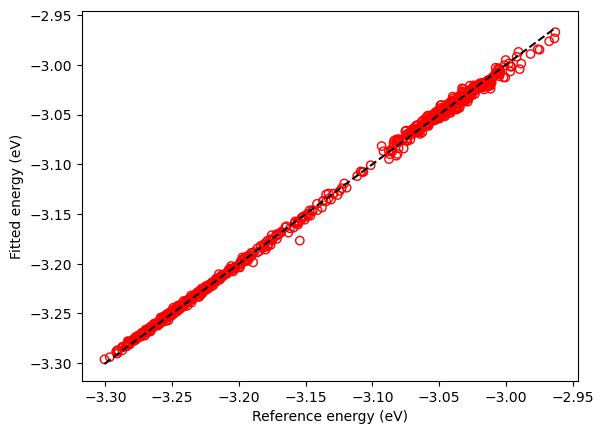

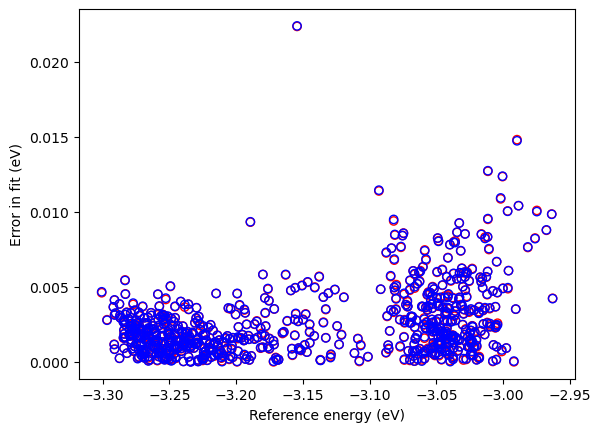

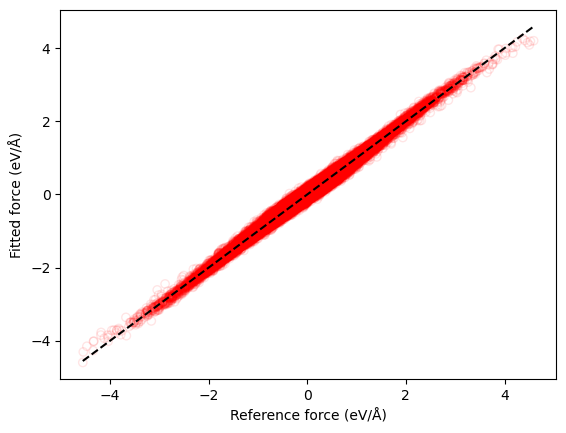

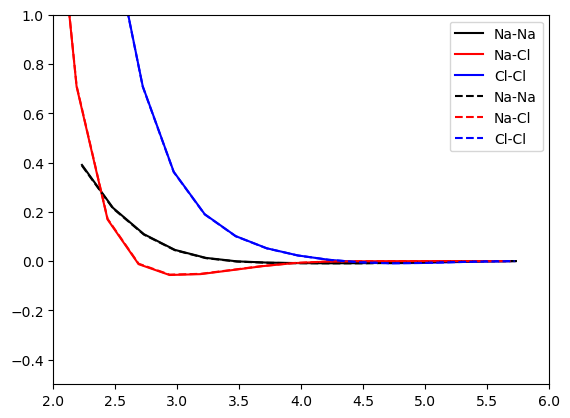

In [5]:

import numpy as np
import json
import matplotlib.pyplot as plt

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

with open("structures.json", "r") as f:
    training_set = json.load(f)

with open("UNC_params.json", "r") as f:
    UNC_params = json.load(f)

err=np.loadtxt("CCS_error.out")
err_UNC=np.loadtxt("UNC_error.out")
err[:,0]=err[:,0]/err[:,3]
err[:,1]=err[:,1]/err[:,3]
err[:,2]=err[:,2]/err[:,3]
err_UNC[:,0]=err_UNC[:,0]/err_UNC[:,3]
err_UNC[:,1]=err_UNC[:,1]/err_UNC[:,3]
err_UNC[:,2]=err_UNC[:,2]/err_UNC[:,3]
plt.xlabel('Reference energy (eV)')
plt.ylabel('Fitted energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
#plt.scatter(err_UNC[:,0],err_UNC[:,1],facecolors='none', edgecolors='blue')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.scatter(err_UNC[:,0],err_UNC[:,2],facecolors='none', edgecolors='blue')
plt.show()


err_F=np.loadtxt("CCS_error_forces.out")
err_F_UNC=np.loadtxt("UNC_error_forces.out")
plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Fitted force (eV/Å)')
plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
#plt.scatter(err_F_UNC[:,0],err_F_UNC[:,1],facecolors='none', edgecolors='blue',alpha=0.1 )
plt.show()




plt.xlim(2,6)
plt.ylim(-0.5,1.0)
# plt.xlabel('Distance (Å)')
# plt.ylabel('Potential (eV)')
r=np.array(CCS_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(CCS_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,color='black',label="Na-Na")
r=np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(CCS_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,NaCl,color='red',label="Na-Cl")
r=np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(CCS_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,color='blue',label="Cl-Cl")

r=np.array(UNC_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(UNC_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,'--',color='black',label="Na-Na")
r=np.array(UNC_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(UNC_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,NaCl,'--',color='red',label="Na-Cl")
r=np.array(UNC_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(UNC_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,'--',color='blue',label="Cl-Cl")

plt.legend()
plt.show()

In [11]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS+Q",CCS_params="CCS_params.json",charge_dict={"Na": 1,"Cl":-1},DFT_DB="DFT.db",charge_scaling=True)

  0%|          | 0/699 [00:00<?, ?it/s]c:\Users\jolku587\Anaconda3\envs\CCS_coding\lib\site-packages\ase\utils\__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|██████████| 699/699 [02:17<00:00,  5.09it/s]


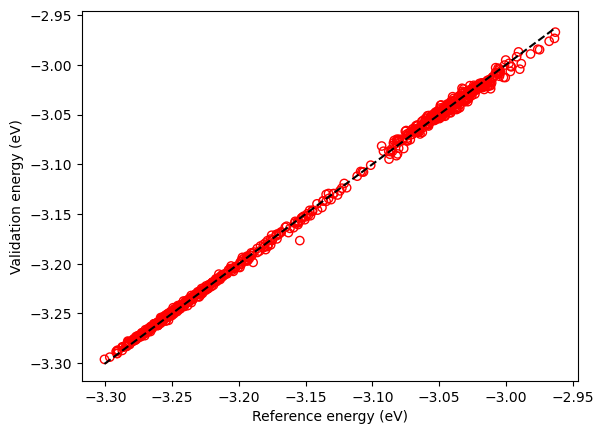

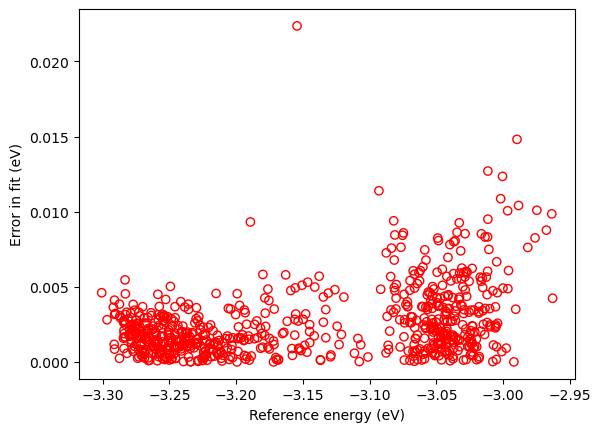

2.5505620919416057


In [6]:

err=np.loadtxt("CCS_validate.dat")
err[:,0]=err[:,0]/err[:,3]
err[:,1]=err[:,1]/err[:,3]
err[:,2]=err[:,2]/err[:,3]
plt.xlabel('Reference energy (eV)')
plt.ylabel('Validation energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.show()

print(err[:,2].mean()*1000)

In [34]:
import json
import sys
import itertools
import numpy as np
from collections import OrderedDict
from ccs_fit.ase_calculator.ccs_ase_calculator import spline_table


def asecalcTotable(jsonfile, scale=10, table="CCS.table",include_exp=False):
    json_file = open(jsonfile)
    CCS_params = json.load(json_file)
    energy = []
    force = []
    tags = {}
    with open(table, "w") as f:
        for pair in CCS_params["Two_body"].keys():
            elem1, elem2 = pair.split("-")
            tb = spline_table(elem1, elem2, CCS_params)
            dr = CCS_params["Two_body"][pair]["dr"] / scale
            if include_exp:
                rmin=dr
            else:
                rmin=CCS_params["Two_body"][pair]["r_min"]
            r = np.arange(rmin, tb.Rcut + dr, dr)
            tags[pair]=dict({'Rmin':rmin,'Rcut':tb.Rcut,'dr':dr,'N':len(r)})
            f.write("\n {}".format(pair))
            f.write("\n N {} R {} {} \n".format(len(r), rmin, tb.Rcut))
            [
                f.write(
                    "\n {} {} {} {}".format(
                        index + 1, elem, tb.eval_energy(elem), tb.eval_force(elem)
                    )
                )
                for index, elem in enumerate(r)
            ]

    return tags

In [14]:
asecalcTotable("CCS_params.json", scale=10, table="CCS.table",include_exp=True)

{'Cl-Cl': {'Rmin': 0.025, 'Rcut': 5.719656084221456, 'dr': 0.025, 'N': 229},
 'Cl-Na': {'Rmin': 0.025, 'Rcut': 5.686360965988248, 'dr': 0.025, 'N': 228},
 'Na-Na': {'Rmin': 0.025, 'Rcut': 5.729651857196728, 'dr': 0.025, 'N': 230}}

In [16]:
from ase.build import bulk

json_file = open("CCS_params.json")
CCS_params = json.load(json_file)

chg=CCS_params['Charge scaling factor']

atoms=bulk('NaCl','rocksalt',a=6.369976562933614,cubic=True)
atoms=atoms*[5,5,5]
f=open("IN.data",'w')

for i in range(len(atoms)):
    if atoms.symbols[i] == 'Na':
        Z=1
        q=chg
    if atoms.symbols[i] == 'Cl':
        Z=2
        q=-chg
    print(i+1,Z,q,*atoms.positions[i,:],file=f)

f.close()

In [6]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS2Q",
        "merging"  : "True",
        "do_unconstrained_fit": "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "sw",
                        "const_type" : "Mono"   
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [7]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Cl', 'Na']
    Generating two-body potentials from one-body information.
    Adding pair: Cl-Cl
    Adding pair: Cl-Na
    Adding pair: Na-Na
    Applying monotonous constraints for pair:  Cl-Cl
    Applying monotonous constraints for pair:  Cl-Na
    Applying monotonous constraints for pair:  Na-Na
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Na
    MSE of unconstrained problem is:  0.01561232772788588
    Final root mean square error in energy:  0.007218324567992221  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


C:\Users\jolku587\PGMS\CCS\src\ccs_fit\fitting\spline_functions.py:321: RuntimeWarning: invalid value encountered in log
  beta = alpha * r0 + np.log(cc / alpha**2)
    Finding optimum switch: 100%|██████████| 3360/3360 [00:27<00:00, 120.76it/s]


    The best switch is (13, 0, 14) with mse: 3.123, corresponding to distances of [5.72 1.94 5.73] Å for element pairs ['Cl-Cl', 'Cl-Na', 'Na-Na'].
    Final root mean square error in energy:  0.007116818445094043  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


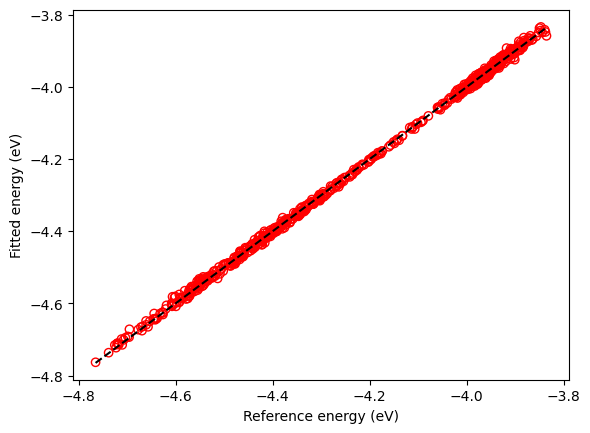

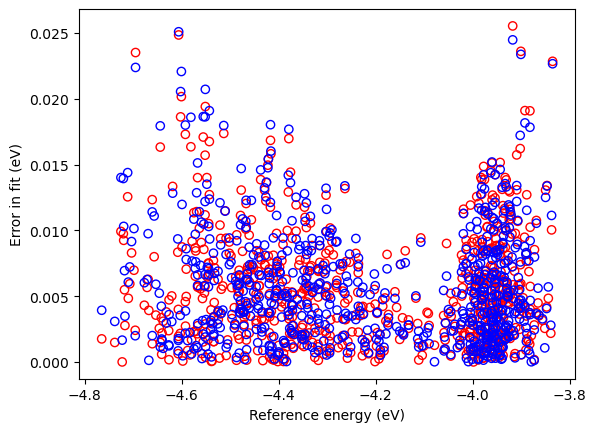

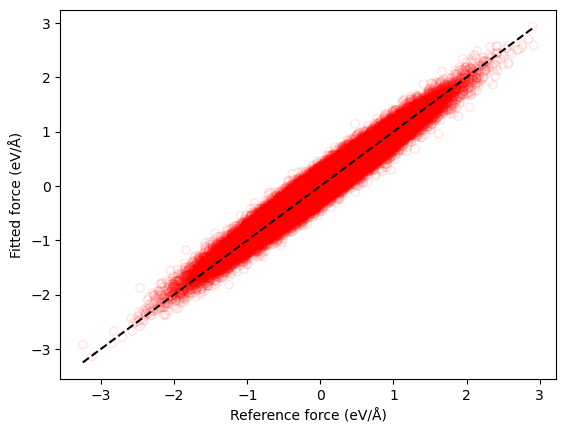

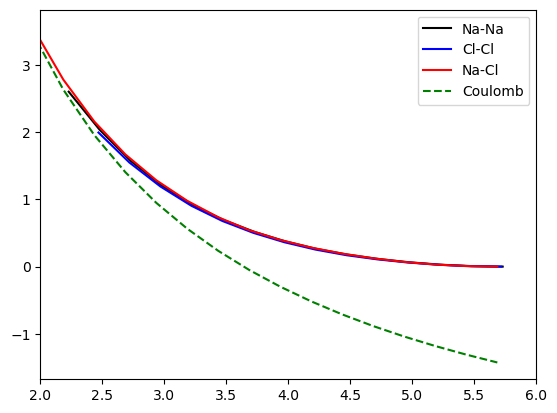

In [26]:

from ase.units import Bohr,Hartree

import numpy as np
import json
import matplotlib.pyplot as plt

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

with open("structures.json", "r") as f:
    training_set = json.load(f)

with open("UNC_params.json", "r") as f:
    UNC_params = json.load(f)


err=np.loadtxt("CCS_error.out")
err_UNC=np.loadtxt("UNC_error.out")
err[:,0]=err[:,0]/err[:,3]
err[:,1]=err[:,1]/err[:,3]
err[:,2]=err[:,2]/err[:,3]
err_UNC[:,0]=err_UNC[:,0]/err_UNC[:,3]
err_UNC[:,1]=err_UNC[:,1]/err_UNC[:,3]
err_UNC[:,2]=err_UNC[:,2]/err_UNC[:,3]
plt.xlabel('Reference energy (eV)')
plt.ylabel('Fitted energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
#plt.scatter(err_UNC[:,0],err_UNC[:,1],facecolors='none', edgecolors='blue')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.scatter(err_UNC[:,0],err_UNC[:,2],facecolors='none', edgecolors='blue')
plt.show()


err_F=np.loadtxt("CCS_error_forces.out")
err_F_UNC=np.loadtxt("UNC_error_forces.out")
plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Fitted force (eV/Å)')
plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
#plt.scatter(err_F_UNC[:,0],err_F_UNC[:,1],facecolors='none', edgecolors='blue',alpha=0.1 )
plt.show()

plt.xlim(2,6)
#plt.ylim(0,6.0)
# plt.xlabel('Distance (Å)')
# plt.ylabel('Potential (eV)')
r=np.array(CCS_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(CCS_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,color='black',label="Na-Na")
r=np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(CCS_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,color='blue',label="Cl-Cl")
r=np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(CCS_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,-NaCl,color='red',label="Na-Cl")

offset=-np.array(CCS_params["One_body"]["Cl"])
plt.plot(r,(Hartree*Bohr)*(r**(-1)) -offset ,'--',color='green',label="Coulomb")




# r=np.array(UNC_params["Two_body"]["Na-Na"]["r"])
# NaNa=np.array(UNC_params["Two_body"]["Na-Na"]["spl_a"])
# plt.plot(r,NaNa,'--',color='black',label="Na-Na")
# r=np.array(UNC_params["Two_body"]["Cl-Na"]["r"])
# NaCl=np.array(UNC_params["Two_body"]["Cl-Na"]["spl_a"])
# plt.plot(r,NaCl,'--',color='red',label="Na-Cl")
# r=np.array(UNC_params["Two_body"]["Cl-Cl"]["r"])
# ClCl=np.array(UNC_params["Two_body"]["Cl-Cl"]["spl_a"])
# plt.plot(r,-ClCl,'--',color='blue',label="Cl-Cl")

plt.legend()
plt.show()

In [29]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
        "do_unconstrained_fit": "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "sw",
                        "const_type" : "Mono"   
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [1]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Cl', 'Na']
    Generating two-body potentials from one-body information.
    Adding pair: Cl-Cl
    Adding pair: Cl-Na
    Adding pair: Na-Na
    Applying monotonous constraints for pair:  Cl-Cl
    Applying monotonous constraints for pair:  Cl-Na
    Applying monotonous constraints for pair:  Na-Na
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Na
    MSE of unconstrained problem is:  0.004066581130205501
    MSE from ridge regression:  0.004071177391277946 Regularization (alpha):  0.1


    Finding optimum switch: 100%|██████████| 3360/3360 [00:22<00:00, 147.13it/s]


    The best switch is (12, 7, 11) with mse: 0.78538, corresponding to distances of [5.47 3.69 4.98] Å for element pairs ['Cl-Cl', 'Cl-Na', 'Na-Na'].


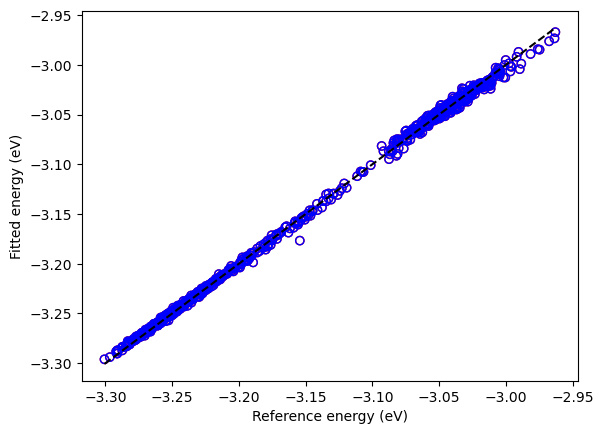

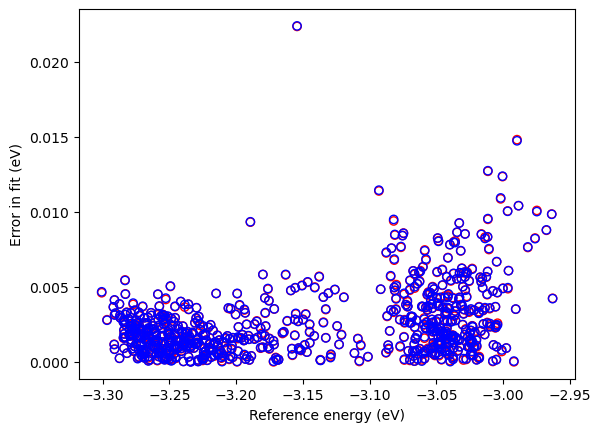

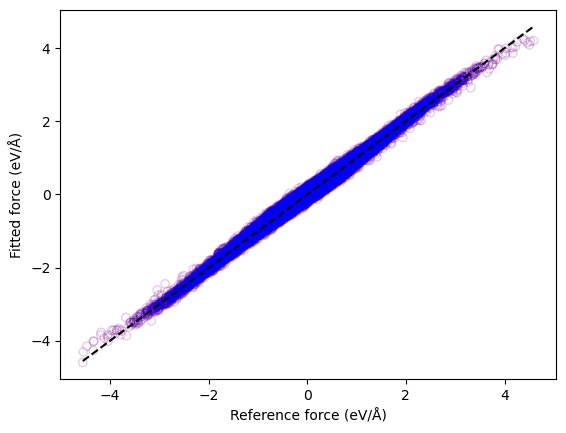

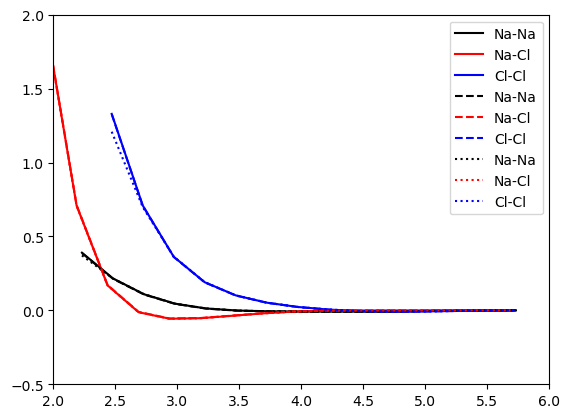

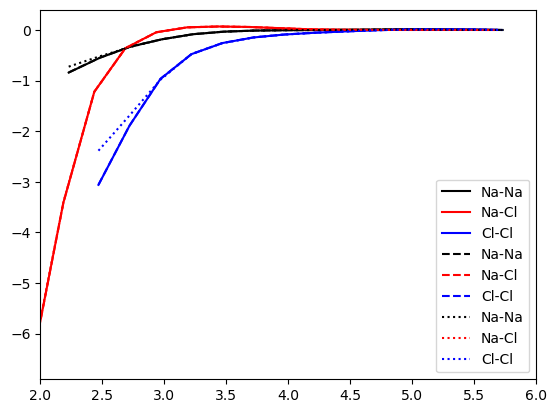

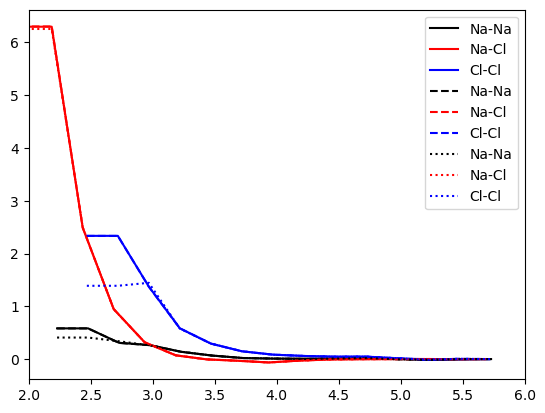

In [8]:

import numpy as np
import json
import matplotlib.pyplot as plt

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

with open("structures.json", "r") as f:
    training_set = json.load(f)

with open("UNC_params.json", "r") as f:
    UNC_params = json.load(f)

with open("RIDGE_params.json", "r") as f:
    RIDGE_params = json.load(f)

err=np.loadtxt("CCS_error.out")
err_UNC=np.loadtxt("UNC_error.out")
err[:,0]=err[:,0]/err[:,3]
err[:,1]=err[:,1]/err[:,3]
err[:,2]=err[:,2]/err[:,3]
err_UNC[:,0]=err_UNC[:,0]/err_UNC[:,3]
err_UNC[:,1]=err_UNC[:,1]/err_UNC[:,3]
err_UNC[:,2]=err_UNC[:,2]/err_UNC[:,3]
plt.xlabel('Reference energy (eV)')
plt.ylabel('Fitted energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
plt.scatter(err_UNC[:,0],err_UNC[:,1],facecolors='none', edgecolors='blue')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.scatter(err_UNC[:,0],err_UNC[:,2],facecolors='none', edgecolors='blue')
plt.show()
err_F=np.loadtxt("CCS_error_forces.out")
err_F_UNC=np.loadtxt("UNC_error_forces.out")
plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Fitted force (eV/Å)')
plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
plt.scatter(err_F_UNC[:,0],err_F_UNC[:,1],facecolors='none', edgecolors='blue',alpha=0.1 )
plt.show()




plt.xlim(2,6)
plt.ylim(-0.5,2.0)
# plt.xlabel('Distance (Å)')
# plt.ylabel('Potential (eV)')
r=np.array(CCS_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(CCS_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,color='black',label="Na-Na")
r=np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(CCS_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,NaCl,color='red',label="Na-Cl")
r=np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(CCS_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,color='blue',label="Cl-Cl")

r=np.array(UNC_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(UNC_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,'--',color='black',label="Na-Na")
r=np.array(UNC_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(UNC_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,NaCl,'--',color='red',label="Na-Cl")
r=np.array(UNC_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(UNC_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,'--',color='blue',label="Cl-Cl")

r=np.array(RIDGE_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(RIDGE_params["Two_body"]["Na-Na"]["spl_a"])
plt.plot(r,NaNa,linestyle='dotted',color='black',label="Na-Na")
r=np.array(RIDGE_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(RIDGE_params["Two_body"]["Cl-Na"]["spl_a"])
plt.plot(r,NaCl,linestyle='dotted',color='red',label="Na-Cl")
r=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["spl_a"])
plt.plot(r,ClCl,linestyle='dotted',color='blue',label="Cl-Cl")
plt.legend()
plt.show()





plt.xlim(2,6)
#plt.ylim(-0.5,2.0)
# plt.xlabel('Distance (Å)')
# plt.ylabel('Potential (eV)')
r=np.array(CCS_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(CCS_params["Two_body"]["Na-Na"]["spl_b"])
plt.plot(r,NaNa,color='black',label="Na-Na")
r=np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(CCS_params["Two_body"]["Cl-Na"]["spl_b"])
plt.plot(r,NaCl,color='red',label="Na-Cl")
r=np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(CCS_params["Two_body"]["Cl-Cl"]["spl_b"])
plt.plot(r,ClCl,color='blue',label="Cl-Cl")

r=np.array(UNC_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(UNC_params["Two_body"]["Na-Na"]["spl_b"])
plt.plot(r,NaNa,'--',color='black',label="Na-Na")
r=np.array(UNC_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(UNC_params["Two_body"]["Cl-Na"]["spl_b"])
plt.plot(r,NaCl,'--',color='red',label="Na-Cl")
r=np.array(UNC_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(UNC_params["Two_body"]["Cl-Cl"]["spl_b"])
plt.plot(r,ClCl,'--',color='blue',label="Cl-Cl")

r=np.array(RIDGE_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(RIDGE_params["Two_body"]["Na-Na"]["spl_b"])
plt.plot(r,NaNa,linestyle='dotted',color='black',label="Na-Na")
r=np.array(RIDGE_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(RIDGE_params["Two_body"]["Cl-Na"]["spl_b"])
plt.plot(r,NaCl,linestyle='dotted',color='red',label="Na-Cl")
r=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["spl_b"])
plt.plot(r,ClCl,linestyle='dotted',color='blue',label="Cl-Cl")
plt.legend()
plt.show()




plt.xlim(2,6)
#plt.ylim(-0.5,2.0)
# plt.xlabel('Distance (Å)')
# plt.ylabel('Potential (eV)')
r=np.array(CCS_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(CCS_params["Two_body"]["Na-Na"]["spl_c"])
plt.plot(r,NaNa,color='black',label="Na-Na")
r=np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(CCS_params["Two_body"]["Cl-Na"]["spl_c"])
plt.plot(r,NaCl,color='red',label="Na-Cl")
r=np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(CCS_params["Two_body"]["Cl-Cl"]["spl_c"])
plt.plot(r,ClCl,color='blue',label="Cl-Cl")

r=np.array(UNC_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(UNC_params["Two_body"]["Na-Na"]["spl_c"])
plt.plot(r,NaNa,'--',color='black',label="Na-Na")
r=np.array(UNC_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(UNC_params["Two_body"]["Cl-Na"]["spl_c"])
plt.plot(r,NaCl,'--',color='red',label="Na-Cl")
r=np.array(UNC_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(UNC_params["Two_body"]["Cl-Cl"]["spl_c"])
plt.plot(r,ClCl,'--',color='blue',label="Cl-Cl")

r=np.array(RIDGE_params["Two_body"]["Na-Na"]["r"])
NaNa=np.array(RIDGE_params["Two_body"]["Na-Na"]["spl_c"])
plt.plot(r,NaNa,linestyle='dotted',color='black',label="Na-Na")
r=np.array(RIDGE_params["Two_body"]["Cl-Na"]["r"])
NaCl=np.array(RIDGE_params["Two_body"]["Cl-Na"]["spl_c"])
plt.plot(r,NaCl,linestyle='dotted',color='red',label="Na-Cl")
r=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["r"])
ClCl=np.array(RIDGE_params["Two_body"]["Cl-Cl"]["spl_c"])
plt.plot(r,ClCl,linestyle='dotted',color='blue',label="Cl-Cl")
plt.legend()
plt.show()

In [35]:
asecalcTotable("CCS_params.json", scale=10, table="CCS.table",include_exp=True)

{'Cl-Cl': {'Rmin': 0.025, 'Rcut': 5.719656084221456, 'dr': 0.025, 'N': 229},
 'Cl-Na': {'Rmin': 0.025, 'Rcut': 5.686360965988248, 'dr': 0.025, 'N': 228},
 'Na-Na': {'Rmin': 0.025, 'Rcut': 5.729651857196728, 'dr': 0.025, 'N': 230}}